In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
titanic_data=pd.read_csv('dataset/titanic/train.csv')

In [82]:
titanic_data.describe()



PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

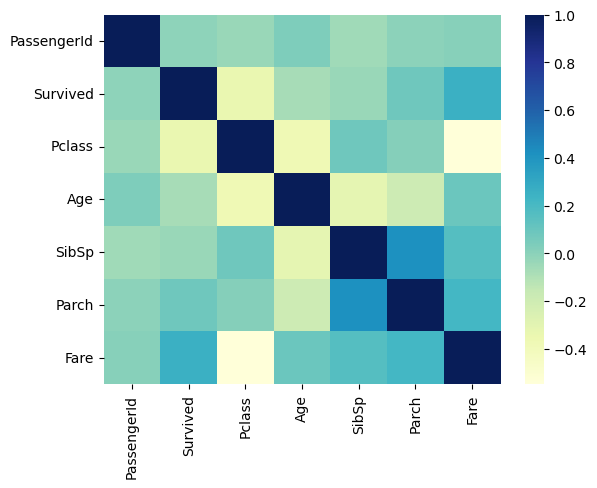

In [83]:
import seaborn as sns
sns.heatmap(titanic_data.corr(),cmap="YlGnBu")
plt.show()

In [84]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_indices,test_indices in split.split(titanic_data,titanic_data[["Survived","Pclass","Sex"]]):
    strat_train_set=titanic_data.loc[train_indices]
    strat_test_set=titanic_data.loc[test_indices]

<AxesSubplot:>

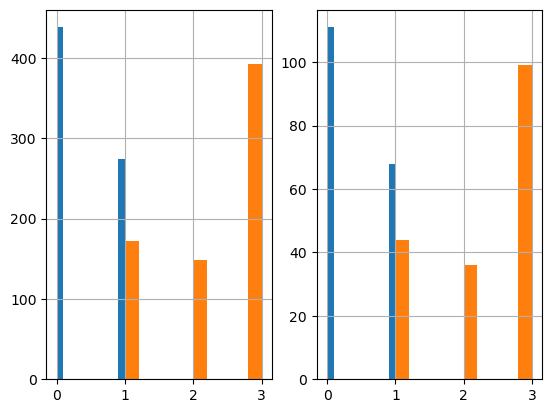

In [85]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()


plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

In [86]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 810 to 567
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          571 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        165 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [87]:
#BaseEstimator is a class to befine basic estimator, Tranform to fit transform 

from sklearn.base import BaseEstimator,TransformerMixin 
from sklearn.impute import SimpleImputer

class AgeImputer (BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        imputer=SimpleImputer(strategy="mean")
        X['Age']=imputer.fit_transform(X[['Age']])
        return X

In [88]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        encoder=OneHotEncoder()
        matrix=encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names=["C","S","Q","N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
        
        matrix=encoder.fit_transform(X[['Sex']]).toarray()
        
        column_names=["Female","Male"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
        
        return X

In [89]:
class FeatureDropper(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"],axis=1,errors="ignore")
    

In [90]:
from sklearn.pipeline import Pipeline

pipeline=Pipeline([("ageimputer",AgeImputer()),
                  ("featureencoder",FeatureEncoder()),
                   ("featuredropper",FeatureDropper())])

In [91]:
strat_train_set=pipeline.fit_transform(strat_train_set)

In [92]:
strat_train_set

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare    C    S  \
810          811         0       3  26.0      0      0   7.8875  0.0  0.0   
690          691         1       1  31.0      1      0  57.0000  0.0  0.0   
870          871         0       3  26.0      0      0   7.8958  0.0  0.0   
161          162         1       2  40.0      0      0  15.7500  0.0  0.0   
54            55         0       1  65.0      0      1  61.9792  1.0  0.0   
..           ...       ...     ...   ...    ...    ...      ...  ...  ...   
219          220         0       2  30.0      0      0  10.5000  0.0  0.0   
191          192         0       2  19.0      0      0  13.0000  0.0  0.0   
752          753         0       3  33.0      0      0   9.5000  0.0  0.0   
553          554         1       3  22.0      0      0   7.2250  1.0  0.0   
567          568         0       3  29.0      0      4  21.0750  0.0  0.0   

       Q  Female  Male  
810  1.0     0.0   1.0  
690  1.0     0.0   1.0  
870  1.0     0.0   1.0  
161  1.0     1.0   0.0  
54   0.0     0.0   1.0  
..   ...     ...   ...  
219  1.0     0.0   1.0  
191  1.0     0.0   1.0  
752  1.0     0.0   1.0  
553  0.0     0.0   1.0  
567  1.0     1.0   0.0  

[712 rows x 12 columns]

In [93]:
from sklearn.preprocessing import StandardScaler

X=strat_train_set.drop(['Survived'],axis=1)
y=strat_train_set['Survived']

scaler=StandardScaler()
X_data=scaler.fit_transform(X)
y_data=y.to_numpy()

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf=RandomForestClassifier()

param_grid=[
    {"n_estimators":[10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}
]

grid_search=GridSearchCV(clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_data,y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [95]:
final_clf=grid_search.best_estimator_

In [96]:
final_clf

RandomForestClassifier()

In [97]:
strat_test_set=pipeline.fit_transform(strat_test_set)


In [98]:
X_test=strat_test_set.drop(['Survived'],axis=1)
y_test=strat_test_set['Survived']

scaler=StandardScaler()

X_data_test=scaler.fit_transform(X_test)
y_data_test=y_test.to_numpy()

In [99]:
final_clf.score(X_test,y_data_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.6201117318435754

In [100]:
final_data=pipeline.fit_transform(titanic_data)

In [101]:
final_data

PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare    C  \
0              1         0       3  22.000000      1      0   7.2500  0.0   
1              2         1       1  38.000000      1      0  71.2833  1.0   
2              3         1       3  26.000000      0      0   7.9250  0.0   
3              4         1       1  35.000000      1      0  53.1000  0.0   
4              5         0       3  35.000000      0      0   8.0500  0.0   
..           ...       ...     ...        ...    ...    ...      ...  ...   
886          887         0       2  27.000000      0      0  13.0000  0.0   
887          888         1       1  19.000000      0      0  30.0000  0.0   
888          889         0       3  29.699118      1      2  23.4500  0.0   
889          890         1       1  26.000000      0      0  30.0000  1.0   
890          891         0       3  32.000000      0      0   7.7500  0.0   

       S    Q  Female  Male  
0    0.0  1.0     0.0   1.0  
1    0.0  0.0     1.0   0.0  
2    0.0  1.0     1.0   0.0  
3    0.0  1.0     1.0   0.0  
4    0.0  1.0     0.0   1.0  
..   ...  ...     ...   ...  
886  0.0  1.0     0.0   1.0  
887  0.0  1.0     1.0   0.0  
888  0.0  1.0     1.0   0.0  
889  0.0  0.0     0.0   1.0  
890  1.0  0.0     0.0   1.0  

[891 rows x 12 columns]

In [102]:
X_final=final_data.drop(['Survived'],axis=1)
y_final=final_data['Survived']

scaler=StandardScaler()

X_data_final=scaler.fit_transform(X_final)
y_data_final=y_final.to_numpy()

In [103]:
prod_clf=RandomForestClassifier()

param_grid=[
    {"n_estimators":[10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}
]

grid_search=GridSearchCV(prod_clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_data_final,y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [104]:
prod_final_clf=grid_search.best_estimator_

In [120]:
titanic_test_data=pd.read_csv("dataset/titanic/test.csv")

In [121]:
final_test_data=pipeline.fit_transform(titanic_test_data)

In [116]:


if 'test_scores' in final_test_data.columns:
    X_final_test = final_test_data.copy()
    X_final_test['test_scores'] = X_final_test['test_scores'].fillna(method="ffill")

    scaler = StandardScaler()
    X_data_final_test = scaler.fit_transform(X_final_test)
else:
    print("Error: 'test_scores' column does not exist in final_test_data DataFrame.")


Error: 'test_scores' column does not exist in final_test_data DataFrame.


In [118]:
print(final_test_data.columns)
for column in final_test_data.columns:
    print(column)
    print(final_test_data[column].head())  # Printing the first few values of each column


Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'S', 'Q',
       'Female', 'Male'],
      dtype='object')
PassengerId
0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64
Pclass
0    3
1    3
2    2
3    3
4    3
Name: Pclass, dtype: int64
Age
0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
Name: Age, dtype: float64
SibSp
0    0
1    1
2    0
3    0
4    1
Name: SibSp, dtype: int64
Parch
0    0
1    0
2    0
3    0
4    1
Name: Parch, dtype: int64
Fare
0     7.8292
1     7.0000
2     9.6875
3     8.6625
4    12.2875
Name: Fare, dtype: float64
C
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: C, dtype: float64
S
0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: S, dtype: float64
Q
0    0.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: Q, dtype: float64
Female
0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: Female, dtype: float64
Male
0    1.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: Male, dtype: float64


In [122]:
predictions=prod_final_clf.predict(X_data_final_test)

NameError: name 'X_data_final_test' is not defined